# Data science and Python

## The sources used:
* [Kdnuggets](http://www.kdnuggets.com/)
* [Wickham, H. Tidy data, The Journal of Statistical Software, 2014](http://vita.had.co.nz/papers/tidy-data.pdf)
* [Big data: The next frontier for innovation, competition, and productivity, Report by McKinsey Global Institute](http://www.mckinsey.com/insights/business_technology/big_data_the_next_frontier_for_innovation)
* [Data smart, Foreman, John W.](http://www.amazon.com/Data-Smart-Science-Transform-Information/dp/111866146X)
* [Data Mining: Concepts and Techniques, Han, J., Kamber, M. and Pei, J.](http://www.amazon.com/Data-Mining-Concepts-Techniques-Management/dp/0123814790/ref=asap_bc?ie=UTF8)
* [Data Scientist: The Sexiest Job of the 21st Century, Davenport, T.H., Patil, D.J., Harvard Business Journal, October 2012](https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century/)

# Why data science?


** Data science is the transformation of data using mathematics and statistics into valuable insights, decisions, and products. **

_Data Smart, Foreman, John W._


** It's just a new spin on something people have been doing for a long time. **

_Data Smart, Foreman, John W._

**I keep saying that the sexy job in the next 10 years will be statisticians**

_Hal Varian, chief economist at Google_

<img src="job-titles.jpg" height=100>

## Big data benefits

* Healthcare (17% of US GDP)
* Retail
* Manufacturing
* Telecommunications

## Who is the data scientist?
<img src="ds_scheme.png" height=100>

## Data scientist skills

* **Education**
* **SAS and/or R knowledge**
* **Python Coding**
* **Hadoop platform**
* **SQL Database/Coding**
* **Operating with unstructured data**
* **Business acumen**


**Here’s what you’ll get to do**:

* Oversee data quality monitoring, including processing, management and cleaning.
* Preparation of data extraction and summary for research and/or quality improvement reports.
* Integrate data from various sources for analysis, clean and recode data as needed
* Work extensively in SAS/R including the creation of SAS/R macros.
* Perform statistical analyses including descriptive statistics (group comparisons, regression, etc) and inferential statistics, present results in tables and figures.
* Develop new data processing routines and new data visualization tools.
* Participate and contribute to machine-learning research.
* Attend relevant meetings, courses or workshops as needed.
* Assist and mentor students, trainees, etc with data analyses.

**Here’s what you’ll need:**

* Master’s degree in a relevant discipline (candidates with PhD will be given preference) or equivalent combination of training and experience.
* Excellent proficient in statistical analysis/knowledge of SAS and or R.
* Knowledge of Python, Apache Spark and programming (SQL, C/C++) a definite asset.
* A minimum of 5 years relevant experience.
* Evidence of advanced health research statistical skills (course work and practical experience) including competency in methods for handling, large data, measurement error and missing data.
* Previous experience with machine learning, big data.
* Content expertise on cardiovascular disease a definite asset.
* Proven ability to work with students/staff with limited statistics knowledge an asset.
* Demonstrated creativity and latitude in problem solving. This includes the ability prioritize and execute multiple competing tasks.
* Excellent attention to detail.
* Ability to work independently.
* Excellent written and oral communication skills.
* Strong interpersonal and organizational skills.
* Ability to work in a diverse team environment.

## Data driven companies

* Google
* Amazon
* Social networks
* Teradata
* SAS
* Tableau
* JetBrains (Census Analyzer)
* Wolfram
* Splunk
* ...

# Why Python?

* Large community = Documentation = Brainpower,

* Growing Data Analytics Libraries (NumPy, SciPy, StatsModels, Scikit-Learn, _Pandas_),

* Nice visualization (matplotlib, Plotly, Bokeh),

* General purpose language.

* **NumPy** &ndash; high performance, flexible array structures and operations,
* **SciPy** &ndash; collection of scientific modules and functions (e.g. for regression, optimization, integration),
* **pandas** &ndash; time series and panel data analysis and I/O,
* **PyTables** &ndash; hierarchical, high performance database (e.g. for out-of-memory analytics),
* **matplotlib** &ndash; 2d and 3d visualization,
* **IPython** &ndash; interactive data analytics, visualization, publishing.


## Why not Python?

* Not statically typed?
* Slow?
* I really miss pipes:
```R
totalpm25 <- filter(data, SCC %in% motorVehicleSCC & fips %in% c("24510", "06037")) %>% group_by(year, fips) 
%>% summarise(pm25=mean(Emissions, na.rm = TRUE))
```
* Concurrency?
* Parallelism?

# What about data?

**Information is a quantity that reduces uncertainty about something.**

_Provot, F. and Fawcett, T. in Data Science for Business_


### Before getting knowledge from data:
* Data acquisition
* Data preprocessing
    * Data cleaning
    * Data transformation
    * Data integration
    * Data warehousing

## Data is untidy

* Column headers are values, not variable names
* Multiple variables are stored in one column
* Variables are stored in both rows and columns
* Multiple types of observational units are stored in the same table
* A single observational unit is stored in multiple tables

# Pandas

## Main data structures
* Series
* Index
* Dataframe

## Data acquisition. Web page.

In [21]:
import pandas as pd
import locale
from dateutil.parser import parse
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_html(
    'http://www.cbr.ru/currency_base/dynamics.aspx?VAL_NM_RQ=R01235&date_req1=29.10.2015&date_req2=05.12.2015&rt=1&mode=1', 
    attrs={'class': 'data'}, 
    header=0, 
    parse_dates=True, 
    thousands=' ')[0]
df.rename(columns={u'Дата': 'date', u'Курс': 'rate'}, inplace=True)
df.drop(u'Единиц', axis=1, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 2 columns):
date    27 non-null object
rate    27 non-null object
dtypes: object(2)
memory usage: 648.0+ bytes


In [23]:
df.head()

,date,rate
0,29.10.2015,"65,3159"
1,30.10.2015,"64,1686"
2,31.10.2015,"64,3742"
3,03.11.2015,"63,7993"
4,04.11.2015,"63,8525"


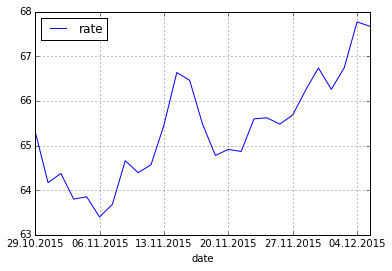

In [25]:
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
df['day']=pd.Series(map(lambda el: parse(el, dayfirst=True).strftime('%A'), df['date']))
df['week']=pd.Series(map(lambda el: parse(el,dayfirst=True).strftime('%U'), df['date']))
locale.setlocale(locale.LC_ALL, 'ru_RU.UTF-8')
df['rate'] = map(lambda el: locale.atof(str(el)), df['rate'])
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

df.plot(x='date', y='rate', grid=True)

## Data manipulation. Movie lens.


In [1]:
import zipfile as zf
import pandas as pd
import urlparse

In [7]:
archive = zf.ZipFile('../../datasets/movie_lens/ml-100k.zip')
users_data = pd.read_csv(archive.open('ml-100k/u.user'), sep='|', header=None, names=('user_id', 'age', 'gender', 'occupation', 'zip_code'))
survey_data = pd.read_csv(archive.open('ml-100k/u.data'), sep='\t', header=None, names=('user_id', 'item_id', 'rating', 'timestamp'))
movies_data = pd.read_csv(
    archive.open('ml-100k/u.item'),
    sep='|', 
    header=None, 
    usecols=[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,18,19,20,21,22,23],
    names=('movie id', 'movie title', 'release date', 'IMDb URL','unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi','Thriller', 'War', 'Western'), 
    parse_dates=[2]
    )
users_data['occupation'].unique()

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'], dtype=object)

In [10]:
survey_with_users=pd.merge(survey_data, users_data, on='user_id')

In [12]:
movies_data.rename(columns={'movie id':'item_id'}, inplace=True)
df_total = pd.merge(survey_with_users, movies_data, on='item_id')
df_total.head()

,user_id,item_id,rating,timestamp,age,gender,occupation,zip_code,movie title,release date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),1997-01-24,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),1997-01-24,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),1997-01-24,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),1997-01-24,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),1997-01-24,...,0,0,0,0,0,0,0,0,0,0


In [17]:
most_frequent_sci = df_total[df_total['occupation']=='scientist']['item_id'].value_counts(normalize=False)
most_freq_movie = movies_data[movies_data['item_id'].isin(most_frequent_sci)]
most_freq_movie.head()

,item_id,movie title,release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995-01-01,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1995-01-01,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1995-01-01,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1995-01-01,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1995-01-01,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
most_frequent_sci.head()

50     19
100    18
258    17
286    17
181    15
Name: item_id, dtype: int64

# Thank you for your attention!